<a href="https://colab.research.google.com/github/1di0t/DeepLearning/blob/main/fashion_mnist_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 새 섹션

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


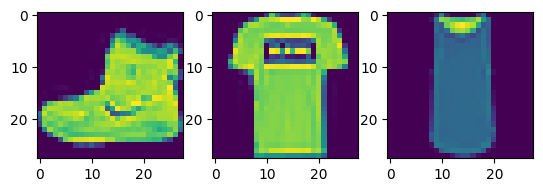

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])
plt.show()

In [5]:
print(train_labels[:3])#https://keras.io/api/datasets/fashion_mnist/

[9 0 0]


In [6]:
#learning
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),#다중분류에서 가장 마지막에 사용하는 활성화 함수
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#최적화함수 : adam(Adaptive moment estimation) <=SGD<= Gradiant Decent의 진화형
#GD의 단점 : 모든 데이터를 넣어서 계산=>느림

In [8]:
model.fit(train_images,train_labels,epochs=10)#default batch size = 32

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6551 - loss: 10.2037
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7206 - loss: 0.7130
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7469 - loss: 0.6280
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7610 - loss: 0.5920
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7966 - loss: 0.5686
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8079 - loss: 0.5405
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8145 - loss: 0.5217
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8237 - loss: 0.5082
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8255 - loss: 0.5095
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8241 - loss: 0.5005


In [9]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"손실 : {test_loss} 정확도 : {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.8144 - loss: 0.5868
손실 : 0.5867534875869751 정확도 : 0.8144000172615051


In [24]:
np.random.randint?

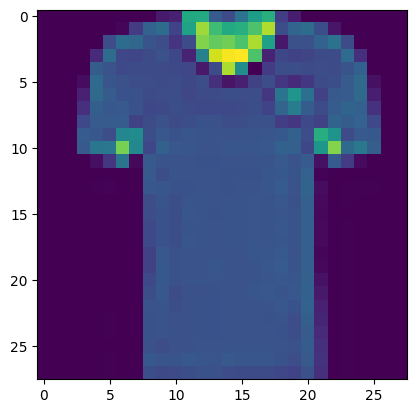

In [18]:
randIdx = np.random.randint(0,1000)
plt.imshow(test_images[randIdx])

In [19]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis,:,:]))
print(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0


In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
print(class_names[yhat])

T-shirt/top
